In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# set the font globally
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2
# update the overall font size
plt.rcParams.update({'font.size':9})

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Question 1

## Load Data
Load the dataset. Separate 70% of the rows to be training data and the rest to be testing data.

In [2]:
# Load data
data = pd.read_csv('transfusion.csv')

In [3]:
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
# Define features and target variable
X = data.drop('whether he/she donated blood in March 2007', axis=1)
y = data['whether he/she donated blood in March 2007']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Decision Tree
Use the training data to fit a decision tree model where the dependent is the last column variable ’whether he/she donated blood in March 2007’. Then produce a plot of the fitted tree. Afterwards find the accuracy of the predictions on the testing data

{'criterion': 'gini', 'max_depth': 3}
[[153  12]
 [ 37  23]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       165
           1       0.66      0.38      0.48        60

    accuracy                           0.78       225
   macro avg       0.73      0.66      0.67       225
weighted avg       0.77      0.78      0.76       225

Test set accuracy: 0.78222


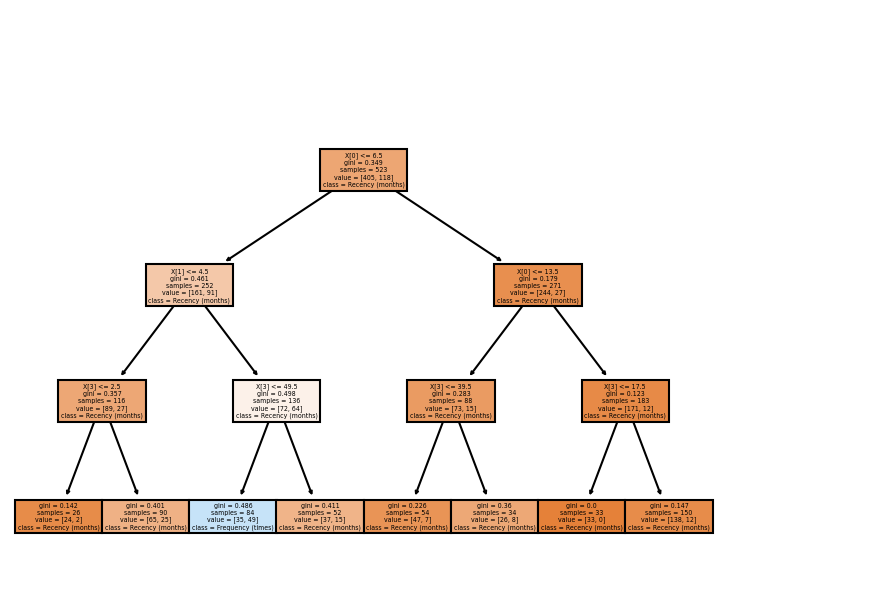

In [6]:
# Define hyperparameter grid
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 7, 10]}

# Fit decision tree model using grid search
model = DecisionTreeClassifier()
grid_search = GridSearchCV(model, param_grid, cv=10, n_jobs = -1)
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print(grid_search.best_params_)

# Plot decision tree with best hyperparameters
plt.figure(figsize=(6,4), dpi=150)
model = grid_search.best_estimator_
plot = tree.plot_tree(model, filled=True, class_names = X_train.columns)
plt.tight_layout()
plt.savefig("figs/DT_Tree.png")

# Evaluate model on test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Test set accuracy: {accuracy:.5f}')

## Random Forest
Use the training data to fit a random forests model where the dependent is the last column variable ’whether he/she donated blood in March 2007’. Then produce a plot of the variable importance. Afterwards find the accuracy of the predictions on the testing data.

{'max_depth': 7, 'n_estimators': 50}
[[151  14]
 [ 44  16]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       165
           1       0.53      0.27      0.36        60

    accuracy                           0.74       225
   macro avg       0.65      0.59      0.60       225
weighted avg       0.71      0.74      0.71       225

Test set accuracy: 0.74222


<Figure size 900x600 with 0 Axes>

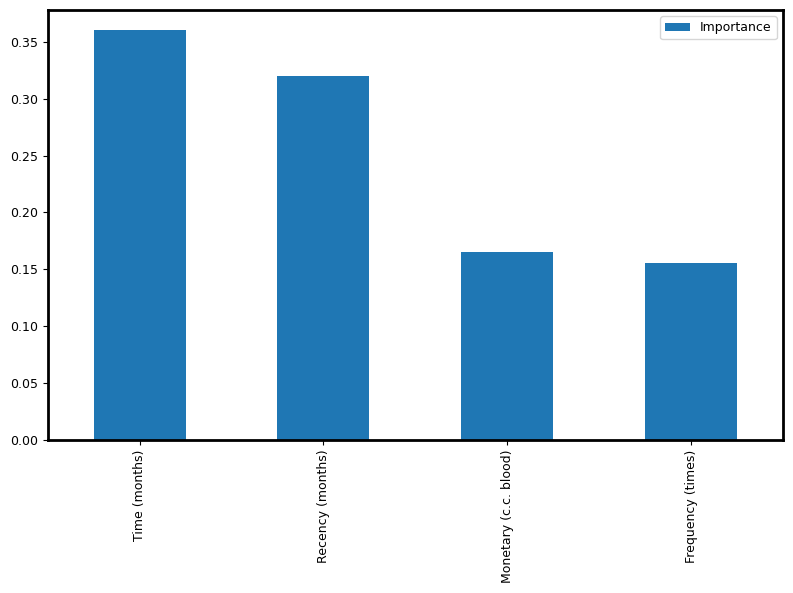

In [7]:
# Define hyperparameter grid
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [3, 5, 7]}

# Fit random forest model using grid search
model = RandomForestClassifier()
grid_search = GridSearchCV(model, param_grid, cv=10, n_jobs = -1)
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print(grid_search.best_params_)

# Plot feature importance of best model
plt.figure(figsize=(6,4), dpi = 150)
model = grid_search.best_estimator_
feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))
plt.tight_layout()
plt.savefig("figs/RF_FeatureImportance.svg")

# Evaluate model on test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Test set accuracy: {accuracy:.5f}')

## XGBoost
Use the training data to fit a XGBoost model where the dependent is the last column variable 'whether he/she donated blood in March 2007'. Afterwards find the accuracy of the predictions on the testing data

In [8]:
# Define hyperparameter grid
param_grid = {'learning_rate': [0.1, 0.5, 1],
              'max_depth': [3, 5, 7]}

# Fit XGBoost model using grid search
model = XGBClassifier()
grid_search = GridSearchCV(model, param_grid, cv=10, n_jobs = -1)
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print(grid_search.best_params_)

# Evaluate model on test set
model = grid_search.best_estimator_
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Test set accuracy: {accuracy:.5f}')

/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.75921626 0.76306241 0.74764151 0.74386792
 0.74764151 0.73232946 0.73428882]
  warnings.warn(


{'learning_rate': 0.5, 'max_depth': 3}
[[145  20]
 [ 43  17]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       165
           1       0.46      0.28      0.35        60

    accuracy                           0.72       225
   macro avg       0.62      0.58      0.59       225
weighted avg       0.69      0.72      0.70       225

Test set accuracy: 0.72000


## Discussion
Given the previous results, how do you gauge and compare the performances of the various models? (mention the accuracies)

Given the small Size of the Dataset, purely using accuracy scores would not give a proper assessment of the models. All models performed well in classifying the negative case but struggled with the postive case. While there were not many Instances where true negatives were being classified as positive (as indicated by the precision score), there were many false negatives (extremely low recall). This could be both due to an imballance in the dataset along a small sample size as well. Overall, the Decision Tree performed the best as it had the highest recall of positives.

# Question 2

## Load Data
Load the dataset. Produce a training and testing dataset on a 70-30 split (randomized selections)

In [9]:
# Load data
data = pd.read_csv('LifeExpectancy.csv', delimiter = ";")

In [10]:
data.head()

,Country,Year,Continent,Least Developed,Life Expectancy,Population,CO2 emissions,Health expenditure,Electric power consumption,Forest area,GDP per capita,Individuals using the Internet,Military expenditure,People practicing open defecation,People using at least basic drinking water services,Obesity among adults,Beer consumption per capita
0,Albania,2000,Europe,False,73.955,3089027,1.026213,7.233370,1414.703784,28.076642,3860.804627,0.114097,1.246360,0.888853,86.754471,12.8,1.33431
1,Albania,2001,Europe,False,74.288,3060173,1.055496,7.139524,1449.647413,28.123248,4299.546493,0.325798,1.309291,0.836397,86.904070,13.3,1.48995
2,Albania,2002,Europe,False,74.579,3051010,1.232379,6.909341,1351.230796,28.169854,4661.402695,0.390081,1.320034,0.781899,87.451635,13.9,1.28697
3,Albania,2003,Europe,False,74.828,3039616,1.338985,7.063490,1578.165919,28.216460,5000.049363,0.971900,1.336843,0.728191,87.987194,14.4,1.44830
4,Albania,2004,Europe,False,75.039,3026939,1.404059,6.773372,1469.264539,28.263066,5427.732662,2.420388,1.381158,0.675281,88.510583,15.0,1.37617


In [11]:
X = data.iloc[:, 5:]
y = data.iloc[:, 4:5]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modeling

### Decision Tree
Produce a decision tree model to predict the life expectancy, excluding the first 4 columns (Country/Year/Continent/Least Developed), using the training data, and find the MSE on the testing data.

{'max_depth': 15, 'min_samples_leaf': 5}
Mean squared error: 7.17388


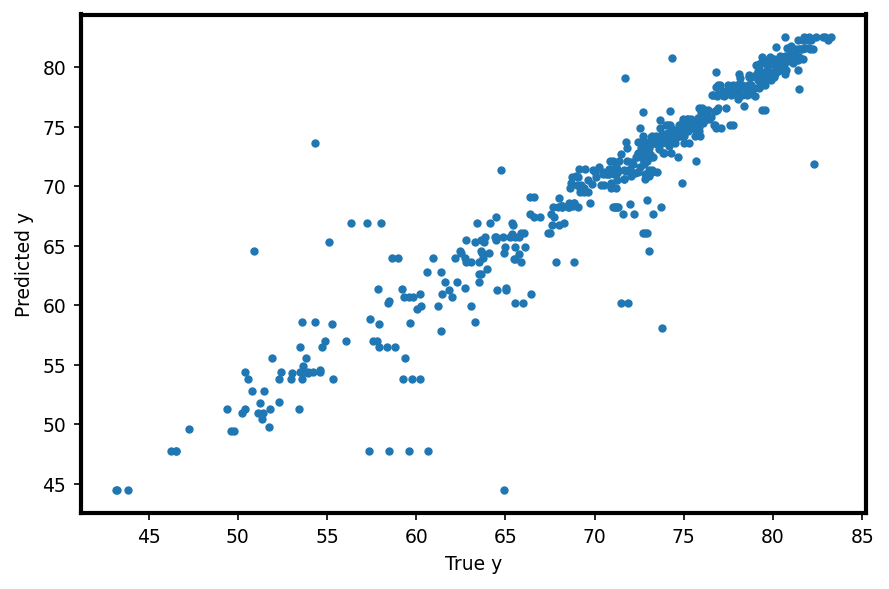

In [13]:
# Define hyperparameter grid
param_grid = {'max_depth': np.arange(3, 31, 2),
              'min_samples_leaf': [5, 10, 20]}

# Fit decision tree regression model using grid search
model = DecisionTreeRegressor()
grid_search = GridSearchCV(model, param_grid, cv=10, n_jobs = -1)
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print(grid_search.best_params_)

# Make predictions on test set
model = grid_search.best_estimator_
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Print MSE
print(f'Mean squared error: {mse:.5f}')

# Plot true and predicted y values
plt.figure(figsize=(6,4), dpi = 150)
plt.plot(y_test, y_pred, '.')
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.tight_layout()
plt.savefig("figs/DT_Regression.svg")

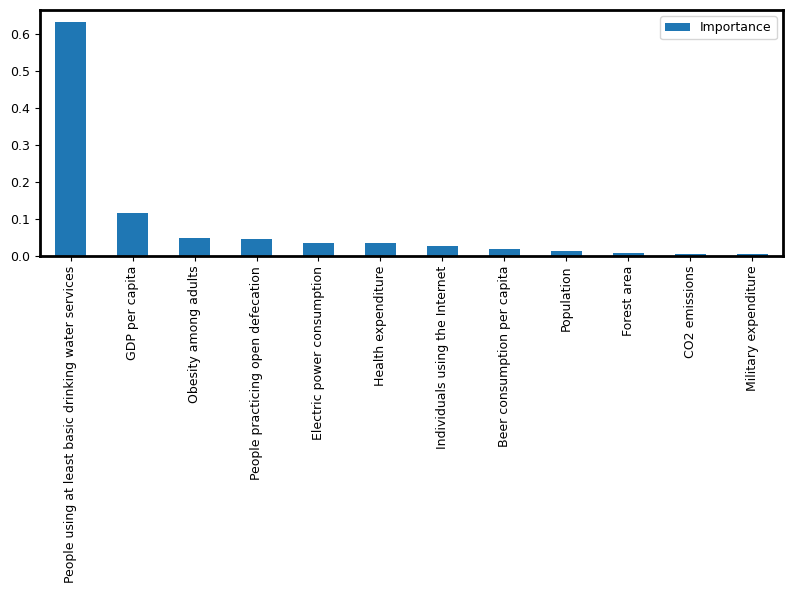

In [14]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))
plt.tight_layout()
plt.savefig("figs/DT_Regression_FeatureImportance.svg")

### Random Forest
Produce a random forest model to predict the life expectancy excluding the first 4 columns (Country/Year/Continent/Least Developed), using the training data, and find the MSE on the testing data.

/opt/conda/envs/rapids/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/rapids/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/envs/rapids/lib/python3.8/site-packages/xgboost/core.py", line 575, in inner_f
    return f(**kwargs)
  File "/opt/conda/envs/rapids/lib/python3.8/site-packages/xgboost/sklearn.py", line 1337, in fit
    if _is_cudf_df(y) or _is_cudf_ser(y):
  File "/opt/conda/envs/rapids/lib/python3

{'max_depth': 29, 'n_estimators': 50}
Mean squared error: 1.57368


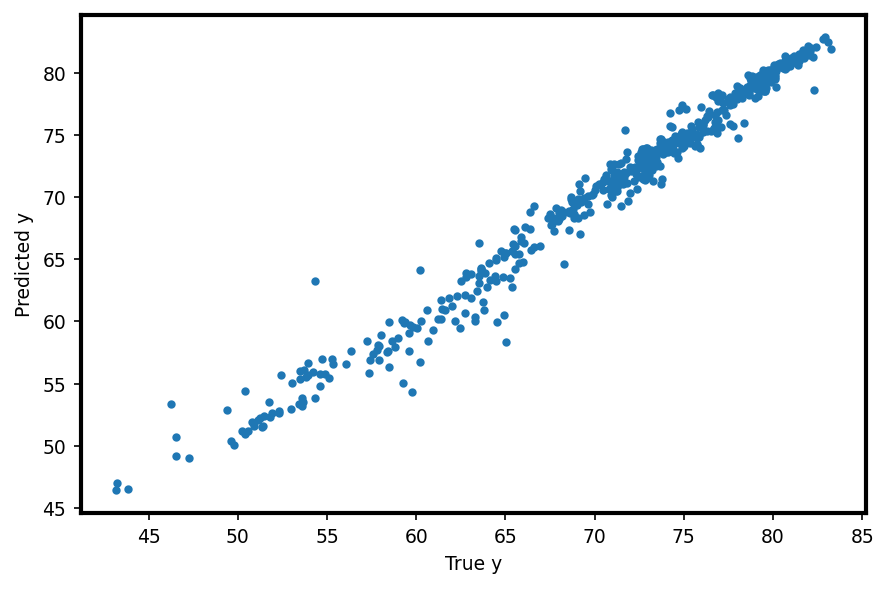

In [15]:
# Define hyperparameter grid
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': np.arange(3, 31, 2)}

# Fit random forest regression model using grid search
model = RandomForestRegressor()
grid_search = GridSearchCV(model, param_grid, cv=10, n_jobs = -1)
grid_search.fit(X_train, np.ravel(y_train))

# Print best hyperparameters
print(grid_search.best_params_)

# Make predictions on test set using best model
model = grid_search.best_estimator_
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Print MSE
print(f'Mean squared error: {mse:.5f}')

# Plot true and predicted y values
plt.figure(figsize=(6,4), dpi = 150)
plt.plot(y_test, y_pred, '.')
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.tight_layout()
plt.savefig("figs/RF_Regression.svg")

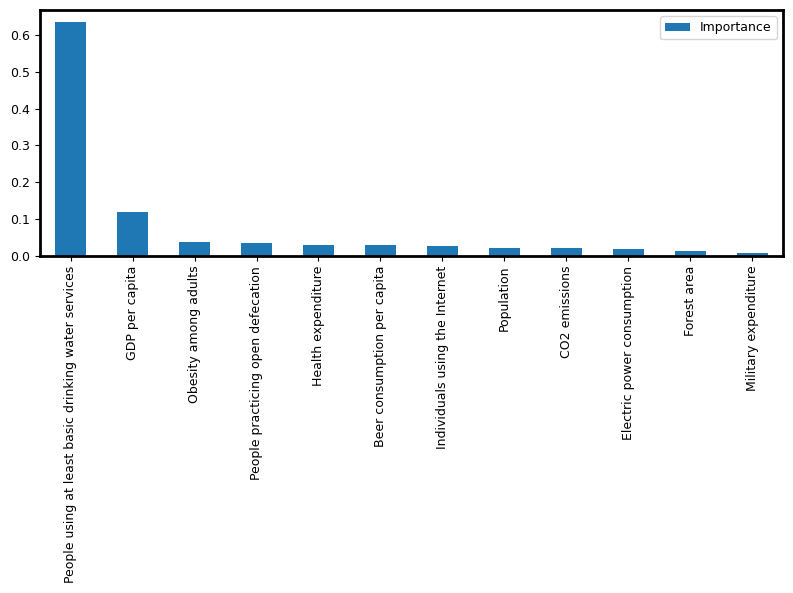

In [16]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))
plt.tight_layout()
plt.savefig("figs/RF_Regression_FeatureImportance.svg")

### XGBoost
Produce an XGBoost model to predict the life expectancy excluding the first 4 columns, (Country/Year/Continent/Least Developed), using the training data, and find the MSE on the testing data.

{'learning_rate': 0.1, 'max_depth': 15}
Mean squared error: 1.05397


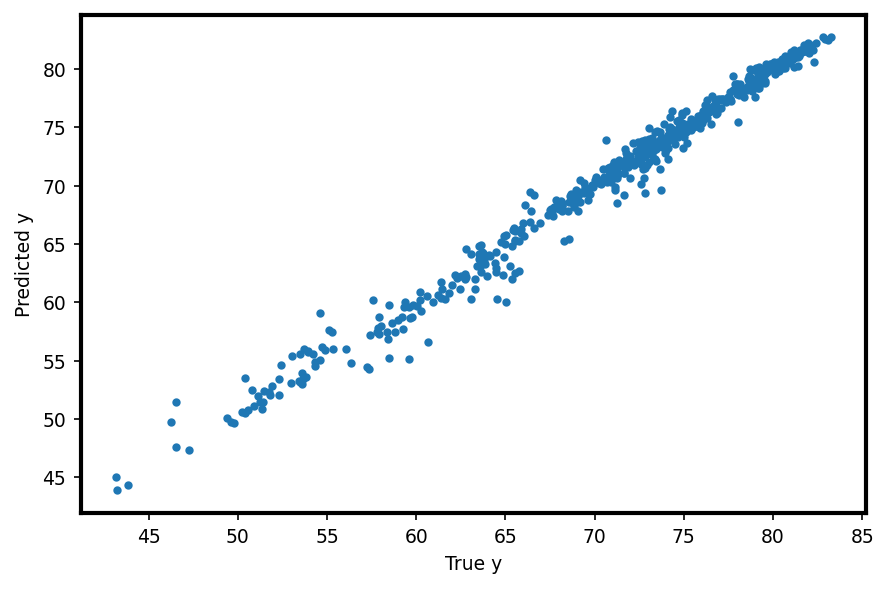

In [17]:
# Define hyperparameter grid
param_grid = {'learning_rate': [0.1, 0.5, 1],
              'max_depth': np.arange(3, 31, 2)}

# Fit XGB regression model using grid search
model = XGBRegressor()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print(grid_search.best_params_)

# Make predictions on test set using best model
model = grid_search.best_estimator_
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Print MSE
print(f'Mean squared error: {mse:.5f}')

# Plot true and predicted y values
plt.figure(figsize=(6,4), dpi = 150)
plt.plot(y_test, y_pred, '.')
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.tight_layout()
plt.savefig("figs/XGB_Regression.svg")
plt.show()

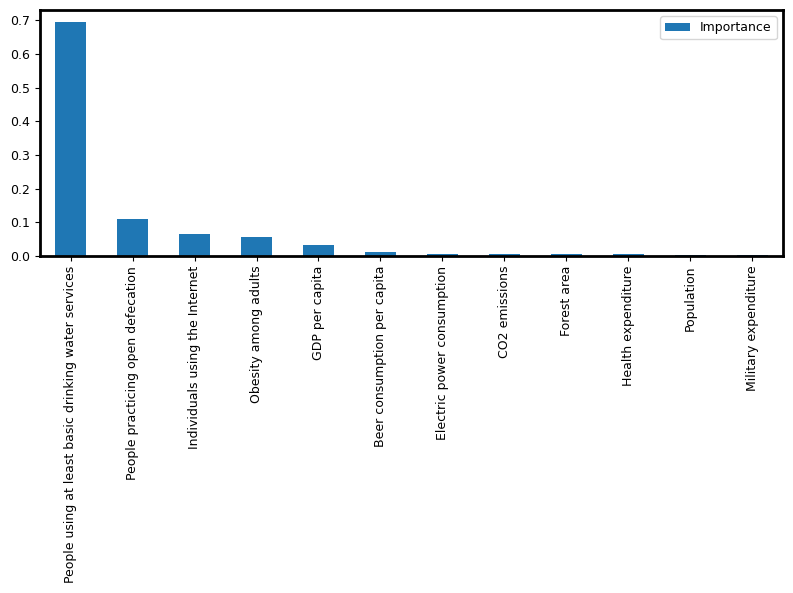

In [18]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))
plt.tight_layout()
plt.savefig("figs/XGB_Regression_FeatureImportance.svg")

### Discussion 
Discuss the merits of each model based upon the MSE. Use your models to then discuss the most important variables for the predictions

The more complex models had better performance than the decision tree using MSE to compare. The best feature in all models was using basic Drinking Water Services. This seems logical because water services is one of the most important infrastuctures. Not having clean drinking water can increase the risk for disease, thus decreasing life expectency. Open defacation can also be a sign of poor infrastructure while usage on internet can be a sign of good infrastructure. This is why these features are so important to the model.

## Load Data in SQL
Place the data (LifeExpectancy.csv), into an SQL data base.

In [19]:
from sqlalchemy.types import String, Integer, Float, Boolean
import sqlalchemy
import psycopg2
from sqlalchemy import create_engine

In [20]:
engine = create_engine('postgresql://admin:secret@db_final:5432/life_expectancy')

In [21]:
data.head()

,Country,Year,Continent,Least Developed,Life Expectancy,Population,CO2 emissions,Health expenditure,Electric power consumption,Forest area,GDP per capita,Individuals using the Internet,Military expenditure,People practicing open defecation,People using at least basic drinking water services,Obesity among adults,Beer consumption per capita
0,Albania,2000,Europe,False,73.955,3089027,1.026213,7.233370,1414.703784,28.076642,3860.804627,0.114097,1.246360,0.888853,86.754471,12.8,1.33431
1,Albania,2001,Europe,False,74.288,3060173,1.055496,7.139524,1449.647413,28.123248,4299.546493,0.325798,1.309291,0.836397,86.904070,13.3,1.48995
2,Albania,2002,Europe,False,74.579,3051010,1.232379,6.909341,1351.230796,28.169854,4661.402695,0.390081,1.320034,0.781899,87.451635,13.9,1.28697
3,Albania,2003,Europe,False,74.828,3039616,1.338985,7.063490,1578.165919,28.216460,5000.049363,0.971900,1.336843,0.728191,87.987194,14.4,1.44830
4,Albania,2004,Europe,False,75.039,3026939,1.404059,6.773372,1469.264539,28.263066,5427.732662,2.420388,1.381158,0.675281,88.510583,15.0,1.37617


In [22]:
dtypes={"country": String(), "year": Integer(), "continent": String(), "least_developed": Boolean(), "life_expectancy": Float(), "population": Integer(),
                 "co2_emissions": Float(), "health_spending": Float(), "electric_power": Float(), "forest_area": Float(), "gdp": Float(),
                 "internet": Float(), "military_spending": Float(), "open_defaction": Float(), "basic_water": Float(), "obesity": Float(),
                 "beer_consumption": Float()}

In [23]:
dtypes.keys()

dict_keys(['country', 'year', 'continent', 'least_developed', 'life_expectancy', 'population', 'co2_emissions', 'health_spending', 'electric_power', 'forest_area', 'gdp', 'internet', 'military_spending', 'open_defaction', 'basic_water', 'obesity', 'beer_consumption'])

In [24]:
data.columns = list(dtypes.keys())

In [25]:
data.to_sql('life', 
           engine, 
           if_exists='replace', 
           index=False, 
           dtype=dtypes )

904

## Visualize Life Expectancy Before and After 2008
Extract all the life expectancy values, from the DB where the year is greater than 2008, and then less than 2008 into 2 separate variables. Then produce a histogram to show the distribution of the values from the 2 variables. Afterwards conduct a t-test to assess whether they have a significant mean difference or not.

In [26]:
pre2008 = pd.read_sql_query("""SELECT life_expectancy
            FROM life
            WHERE year < 2008;""", engine)

post2008 = pd.read_sql_query("""SELECT life_expectancy
            FROM life
            WHERE year > 2008;""", engine)

<Figure size 900x450 with 0 Axes>

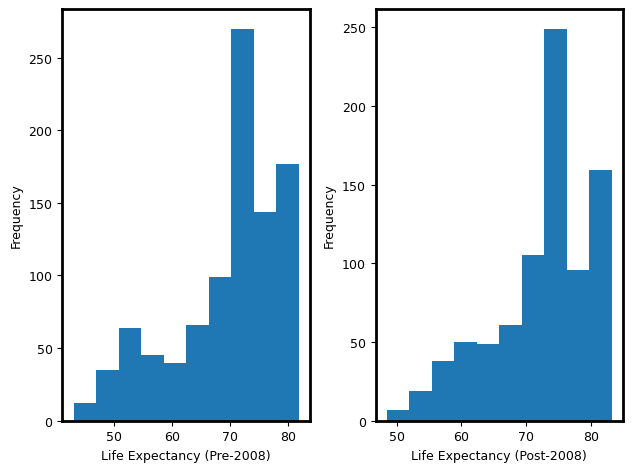

In [27]:
plt.figure(figsize=(6,3), dpi = 150)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

# Plot histogram of x on left subplot
ax1.hist(pre2008)
ax1.set_xlabel('Life Expectancy (Pre-2008)')
ax1.set_ylabel('Frequency')

# Plot histogram of y on right subplot
ax2.hist(post2008)
ax2.set_xlabel('Life Expectancy (Post-2008)')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.savefig("figs/Life_Expectancy.svg")

In [28]:
from scipy.stats import ttest_ind

In [29]:
# Conduct t-test
t, p = ttest_ind(pre2008, post2008)

# Print t-statistic and p-value
print(f't-statistic: {t[0]:.5f}')
print(f'p-value: {p[0]:.5f}')

t-statistic: -7.48032
p-value: 0.00000


## Average Life Expectancy
Using SQL, find the average life expectancy for each country. (use Group By)

In [30]:
avg_le = pd.read_sql("""SELECT country, AVG(life_expectancy)
FROM life
GROUP BY country;""", engine)

In [31]:
avg_le

,country,avg
0,Indonesia,68.266562
1,Bangladesh,68.728687
2,Venezuela,72.757125
3,Brunei Darussalam,74.274750
4,Cameroon,54.025813
...,...,...
114,Nepal,66.278313
115,Tanzania,56.629250
116,Poland,75.640854
117,Costa Rica,78.465875


In [32]:
avg_le.to_csv("avg_life_expectancy (2000-2015).csv", index = False)